# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


![Titanic](https://gfx.wiadomosci.radiozet.pl/var/g3-radiozetwiadomosci/storage/images/swiat/powstanie-drugi-titanic-miliarder-oglosil-date-pierwszego-rejsu/25696853-1-pol-PL/Powstanie-drugi-Titanic.-Miliarder-oglosil-date-pierwszego-rejsu_content.jpg)

# <font color='cyan'>Titanic EDA część 1: Ogólne rozeznanie danych.</font>

In [3]:
# Losowe 20 rekordów
df.sample(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
729,3.0,0.0,"Cor, Mr. Bartol",male,35.0,0.0,0.0,349230,7.8958,NaN,S,NaN,NaN,Austria
772,3.0,0.0,"Dika, Mr. Mirko",male,17.0,0.0,0.0,349232,7.8958,NaN,S,NaN,NaN,NaN
516,2.0,0.0,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0.0,2.0,230080,26.0000,F2,S,NaN,15.0,"Nice, France"
948,3.0,0.0,"Lane, Mr. Patrick",male,NaN,0.0,0.0,7935,7.7500,NaN,Q,NaN,NaN,NaN
762,3.0,1.0,"Dean, Master. Bertram Vere",male,1.0,1.0,2.0,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"
674,3.0,1.0,"Bing, Mr. Lee",male,32.0,0.0,0.0,1601,56.4958,NaN,S,C,NaN,"Hong Kong New York, NY"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
1256,3.0,1.0,"Touma, Master. Georges Youssef",male,7.0,1.0,1.0,2650,15.2458,NaN,C,C,NaN,NaN
1114,3.0,0.0,"Pearce, Mr. Ernest",male,NaN,0.0,0.0,343271,7.0000,NaN,S,NaN,NaN,NaN
101,1.0,0.0,"Dulles, Mr. William Crothers",male,39.0,0.0,0.0,PC 17580,29.7000,A18,C,NaN,133.0,"Philadelphia, PA"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [6]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

### Co do wieku nie jestem zaskoczony, że brakuje wartości, ale o tak dużej liczbie **nie** odnalezionych ciał nawet nie śniłem.
### Zapewne duża cześć ciał odnalezionych to te które dodryfowały do brzegu bo sam **Titanic** rozbił się nie aż tak daleko od lądu.

![Wreck](https://i.wpimg.pl/1200x/i.wp.pl/a/f/jpeg/32335/a/1/a1710da636f8d371cbc7bd52614a1faf.jpeg)

## Do zdarzenia doszło ok 700km od brzegu.

In [3]:
df[df.duplicated()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


Tu bez zaskoczeń, ale zawsze warto się upewnić.

# <font color='cyan'>Titanic EDA część 2: Analiza poszczególnych zmiennych.</font>

### Tutaj skupię się na kilku rzeczach mianowinie na tym kogo najwięcej udało się uratować z podziałem na klasę, płeć oraz wiek.
#### Zobaczymy co mówią nam dane i czy rzeczywiście sytuacja wyglądała jak w filmie, czyli najpierw kobiety i dzieci.

In [4]:
# Najpierw usuniemy wszystkie wiersze w których brakuję wieku, jest to radykalne, ale w tym przypadku kluczowe. Chociaż rozegramy to lepiej kopiowaniem.
age_df = df.copy()

In [5]:
age_df = age_df.dropna(subset=['age'])
age_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


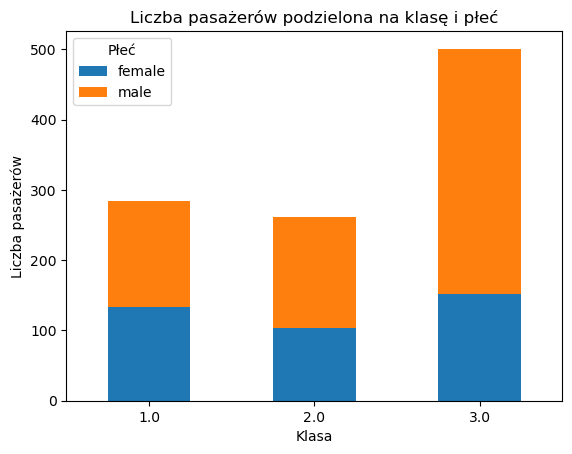

In [6]:
# Tworzeni tabeli podzielonej na klasę i płeć
pivot_table = age_df.pivot_table(index='pclass', columns='sex', aggfunc='size', fill_value=0)

# Tworzenie wykresu
fig, ax = plt.subplots()
pivot_table.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Liczba pasażerów podzielona na klasę i płeć')
ax.set_xlabel('Klasa')
ax.set_ylabel('Liczba pasażerów')
plt.xticks(rotation=0)
plt.legend(title='Płeć')

# Zapisywanie jako PNG
plot_filename = "passengers_by_class_and_gender.png"
plt.savefig(plot_filename)

# Deklarowanie rezultatu
result = { "type": "plot", "value": plot_filename }

Bardzo przydatny wykres idealnie obrazowuję podział pasażerów na klasę i płeć 

Jak widać najwięcej osób podróżowało trzecią klasą co nie jest zaskoczeniem, zaskoczeniem jest natomiat, że pierwsza i druga klasa są do siebie zbliżone, a zakładałem, że pierwszej klasy będzie znacznie mniej od reszty.

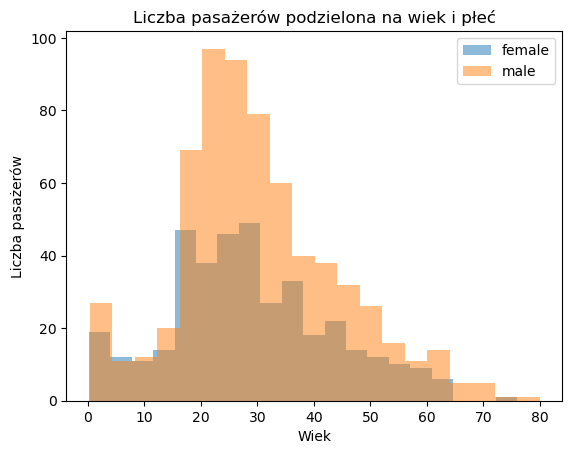

In [7]:
# Tworzenie figur dla wykresu
fig, ax = plt.subplots()

# Tworzenie wykresu
for sex in age_df['sex'].unique():
    subset = age_df[age_df['sex'] == sex]
    ax.hist(subset['age'], bins=20, alpha=0.5, label=sex)

# Tworzenie labelek, chyba nie znam tego słowa po polsku :)
ax.set_xlabel('Wiek')
ax.set_ylabel('Liczba pasażerów')
ax.set_title('Liczba pasażerów podzielona na wiek i płeć')
ax.legend()

# Zapysywanie jako PNG
plot_filename = "passengers_by_age_and_gender.png"
plt.savefig(plot_filename)

# Deklarowanie rezulatu
result = { "type": "plot", "value": plot_filename }

#### I oto naprawdę wiele nam mówiący wykres w dalszej perspektywie, bo zaraz zobaczymy ile osób przeżyło jakiej było płci oraz w jakim byli wieku.

Możemy też zauważyć iż mężczyzn było znacznie więcej niż kobiet, a najliczniejszy przedział wiekowy to 20-30lat, potem osoby w wieku średnim, dzieci i na końcu seniorzy.

![Wykres](https://datachatter.imprv.ai/media/428166be2d386adbb3b5a3dd19f82d07c6b1811e3599e836bd667515.png)

Niestety znowu miałem problem w wyświetleniem, ale znalazłem obejście tyle dobrego.

#### Jak widać na wykresie powyżej uratowano znacznie więcej kobiet i dzieci od mężczyzn

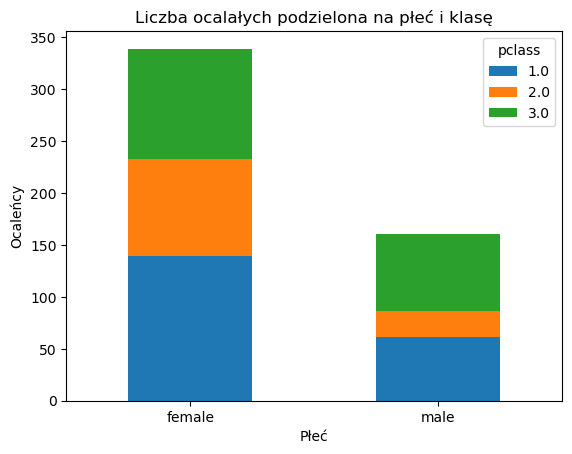

In [16]:
# Usuwanie wierszy z brakującymi danymi
df_filtered = df.dropna(subset=['survived', 'sex', 'pclass'])

# Grupowanie i liczenie
survivors = df_filtered[df_filtered['survived'] == 1].groupby(['sex', 'pclass']).size().unstack()

# Tworzenie wykresu
fig, ax = plt.subplots()
survivors.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Liczba ocalałych podzielona na płeć i klasę')
ax.set_xlabel('Płeć')
ax.set_ylabel('Ocaleńcy')
plt.xticks(rotation=0)

# Zapisywanie jako PNG
plot_filename = "survivors_by_sex_and_class.png"
plt.savefig(plot_filename)

# Deklarowanie rezultatu
result = { "type": "plot", "value": plot_filename }

#### Bez zaskoczeń najwięcej ocalałych to kobiety z każdej klasy.

## Podsumowanie:
- Najwięcej pasażerów na statku podróżowało klasą trzecią i byli to w większości mężczyźni,
- Najliczniejszy przedział wiekowy to 20-30lat, potem osoby w wieku średnim, dzieci i seniorzy,
- Uratowano znacznie więcej kobiet od mężczyzn w prawie każdym przedziale wiekowym,
- Najwięcej ocaleńców to kobiety i dzieci z każdej klasy potwierdziła się moja hipoteza.

# <font color='cyan'>Titanic EDA część 3: Poszukiwanie korelacji między zmiennymi.</font>

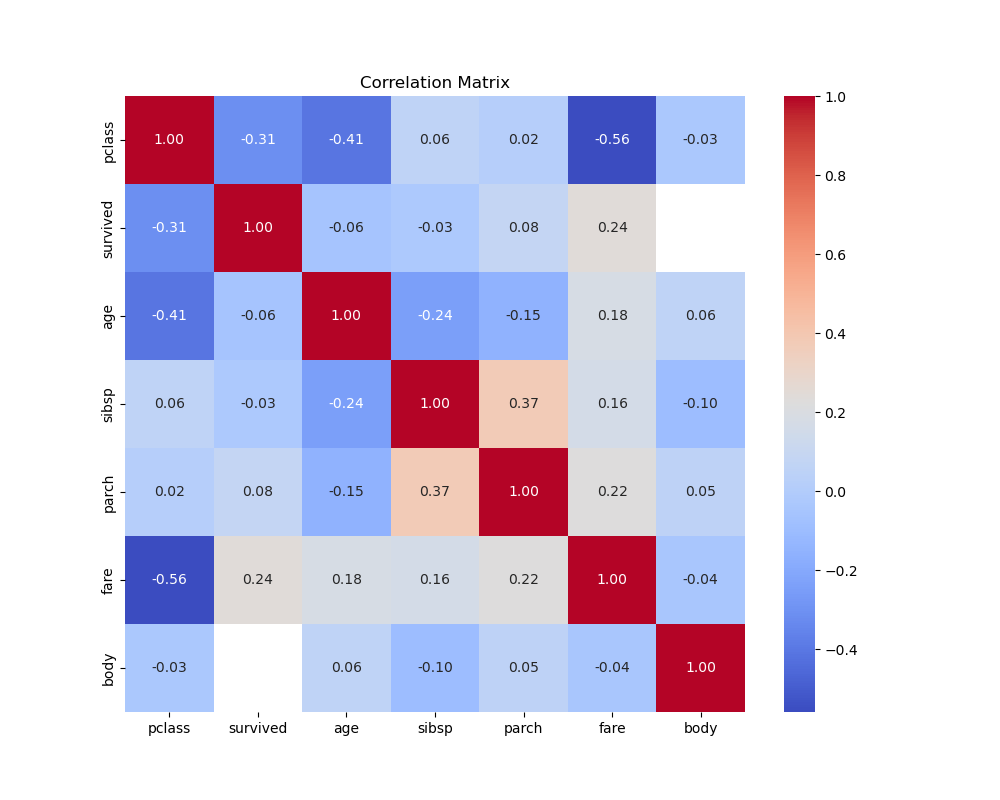

In [14]:
from IPython.display import Image
Image("correlation_matrix.png")

## Podsumowanie:
Nie ma jednoznacznych korelacji między zmiennymi na macierzu, takich jak np. ocaleńcy z podziałem na płeć.
Raczej nie ma się tu doszukiwać, można zaznaczyć iż istnieje lekko odwrócona korelacja między ceną biletu a klasą co nie jest zaskoczeniem.

# <font color='cyan'>Titanic EDA część 4: Poszukiwanie wartości odstających.</font>

In [ ]:
# Usuwanie brakujących wierszy dla kolumn
df_cleaned = df.dropna(subset=['survived', 'age', 'sex'])

# Tworzenie box plotu
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', hue='sex', data=df_cleaned)
plt.title('Age Distribution of Survivors and Non-Survivors by Gender')
plt.xlabel('Survived')
plt.ylabel('Age')

# Zapisywanie jako PNG
plot_filename = "box_plot_survived_age_gender.png"
plt.savefig(plot_filename)
plt.close()

# Deklarowanie rezultatu
result = { "type": "plot", "value": plot_filename }

![Box](https://datachatter.imprv.ai/media/328cbf341f1478cd4684ca5086ebce9aaf4dd8203f63ad344af66888.png)

## Podsumowanie:
Bez zaskoczeń nie wiele wartości odstających u kobiet, a u mężczyzn są już widoczne. To oczywiście za sprawą tego iż kobiet zostało uratowanych więcej.

# <font color='cyan'>Podsumowanie i konkluzja.</font>

### Zacznijmy od tego jak zawsze została ta tragedia przedstawia czy to w mediach czy tekstach kultury. Pominiemy to co się działo na samym statku w trakcie rejsu i od razu przejdziemy do momentu zderzenia z górą lodową. Tak więc co się wtedy działo? Poza paniką pasażerów działa się również ewakuacja i tak jak zawsze było to przedstawiane jest zgodne z rzeczywistością bo najwięcej ocalałych to kobiety i dzieci. Warto również wspomnieć iż dużo ocaleńców to osoby w wieku średnim czyli w przedziale 30-40 lat.

### Podsumowanie:
- Najliczniejszą grupą pasażerów byli mężczyźni podróżujący trzecią klasą,
- Rozkład wieku wygląda następująco najwiecej było osób w przedziale 20-30 lat, potem osoby w wieku średnim, dzieci oraz seniorzy,
- Najwięcej ocaleńców to kobiety i dzieci w każdej z klas, ale najwięcej z pierwszej,
- Prawie całkowity brak wartości odstających,
- Brak jakich kolwiek korelacji z podstawowych kolumn, możemy uznać iż wiek i płeć to para która ma najwyższą korelację jeśli chodzi o przeżywalność


# <font color='cyan'>Dziękuję za uwage!</font>